In [1]:
import sys
# adding search_optimization_tools to the system path
sys.path.insert(0, '../')

In [2]:
import urllib.request  # the lib that handles the url stuff
from search_optimization_tools.algorithms.trajectory_based import SimulatedAnnealing
from search_optimization_tools.problems import TSP
import math
import matplotlib.pyplot as plt

In [3]:
cities = []
ignore = True
for line in urllib.request.urlopen('https://raw.githubusercontent.com/coin-or/jorlib/b3a41ce773e9b3b5b73c149d4c06097ea1511680/jorlib-core/src/test/resources/tspLib/tsp/berlin52.tsp'):
    line = line.decode('utf-8').strip()
    if line == 'EOF':
        break
    if not ignore:
        cord = [float(_) for _ in line.split()[1:]] 
        # print(cord)
        cities.append(cord)
    if line == "NODE_COORD_SECTION":
        ignore = False

In [4]:
berlin52_dists = [ [0] * len(cities) for _ in range(len(cities))]
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        berlin52_dists[i][j] = berlin52_dists[j][i] = math.sqrt((cities[i][0]-cities[j][0])**2 + (cities[i][1]-cities[j][1])**2)


In [5]:
berlin52_tsp_1 = TSP(berlin52_dists, 'random_swap', num_swaps=1)
berlin52_tsp_5 = TSP(berlin52_dists, 'random_swap', num_swaps=5)
berlin52_tsp_10 = TSP(berlin52_dists, 'random_swap', num_swaps=10)
berlin52_tsp_15 = TSP(berlin52_dists, 'random_swap', num_swaps=15)

In [6]:
sa_1  = SimulatedAnnealing(max_iter=7000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)
sa_5  = SimulatedAnnealing(max_iter=7000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)
sa_10 = SimulatedAnnealing(max_iter=7000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)
sa_15 = SimulatedAnnealing(max_iter=7000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)

In [7]:
sols = {
    'sa_1': [0] * (sa_1.max_iter * sa_1.max_iter_per_temp + 1),
    'sa_5': [0] * (sa_5.max_iter * sa_5.max_iter_per_temp + 1),
    'sa_10': [0] * (sa_10.max_iter * sa_10.max_iter_per_temp + 1),
    'sa_15': [0] * (sa_15.max_iter * sa_15.max_iter_per_temp + 1),
}

In [8]:
sa_1.init_annealing(berlin52_tsp_1)
sa_5.init_annealing(berlin52_tsp_5)
sa_10.init_annealing(berlin52_tsp_10)
sa_15.init_annealing(berlin52_tsp_15)
print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_1.val_cur,sa_1.t,sa_1.iter))
print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_5.val_cur,sa_5.t,sa_5.iter))
print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_10.val_cur,sa_10.t,sa_10.iter))
print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_15.val_cur,sa_15.t,sa_15.iter))
print()
sols['sa_1'][0] = sa_1.val_cur
sols['sa_5'][0] = sa_5.val_cur
sols['sa_10'][0] = sa_10.val_cur
sols['sa_15'][0] = sa_15.val_cur
while sa_1.t > sa_1.final_temp and sa_1.iter <= sa_1.max_iter:
    for j in range(sa_1.max_iter_per_temp):
        sa_1.annealing_step()
        sa_5.annealing_step()
        sa_10.annealing_step()
        sa_15.annealing_step()
        sols['sa_1'][sa_1.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_1.val_cur
        sols['sa_5'][sa_5.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_5.val_cur
        sols['sa_10'][sa_10.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_10.val_cur
        sols['sa_15'][sa_15.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_15.val_cur
    
        if sa_1.max_iter_per_temp * (sa_1.iter - 1) + j + 1 % 10000 == 0:
            print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_1.val_best,sa_1.t,sa_1.iter))
            print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_5.val_best,sa_5.t,sa_5.iter))
            print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_10.val_best,sa_10.t,sa_10.iter))
            print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_15.val_best,sa_15.t,sa_15.iter))
            print()

    sa_1.update_temperature()
    sa_5.update_temperature()
    sa_10.update_temperature()
    sa_15.update_temperature()
    sa_1.iter += 1
    sa_5.iter += 1
    sa_10.iter += 1
    sa_15.iter += 1
    

    

print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_1.val_best,sa_1.t,sa_1.iter))
print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_5.val_best,sa_5.t,sa_5.iter))
print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_10.val_best,sa_10.t,sa_10.iter))
print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_15.val_best,sa_15.t,sa_15.iter))


1:  eval_sol=32581.063653299727, cur_temp=10000.000000, cur_iter=1
5:  eval_sol=31862.20535906651, cur_temp=10000.000000, cur_iter=1
10: eval_sol=31566.571498487177, cur_temp=10000.000000, cur_iter=1
15: eval_sol=32279.150447396696, cur_temp=10000.000000, cur_iter=1

1:  eval_sol=23428.173189054258, cur_temp=0.097441, cur_iter=72
5:  eval_sol=22982.317018683596, cur_temp=0.097441, cur_iter=72
10: eval_sol=21846.089164938625, cur_temp=0.097441, cur_iter=72
15: eval_sol=22231.041717524145, cur_temp=0.097441, cur_iter=72


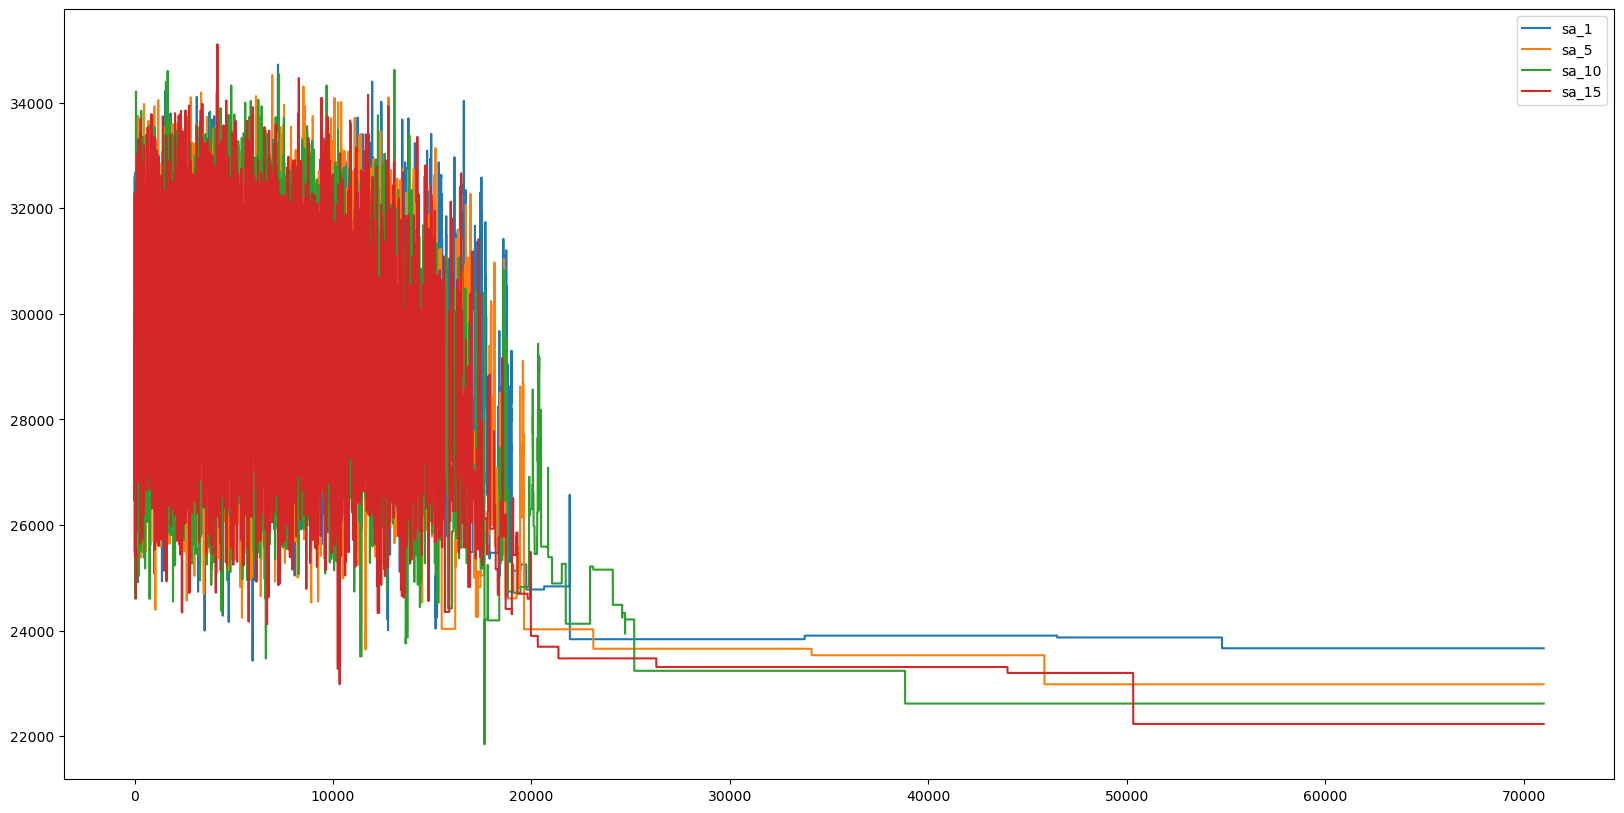

In [23]:
plt.figure(figsize=[20, 10])
plt.plot(sols['sa_1'][:sa_1.max_iter_per_temp * (sa_1.iter - 1) +1])
plt.plot(sols['sa_5'][:sa_5.max_iter_per_temp * (sa_1.iter - 1)  +1])
plt.plot(sols['sa_10'][:sa_10.max_iter_per_temp * (sa_1.iter - 1) +1])
plt.plot(sols['sa_15'][:sa_15.max_iter_per_temp * (sa_1.iter - 1) +1])
plt.legend(['sa_1', 'sa_5', 'sa_10', 'sa_15'])